In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Q1

# a

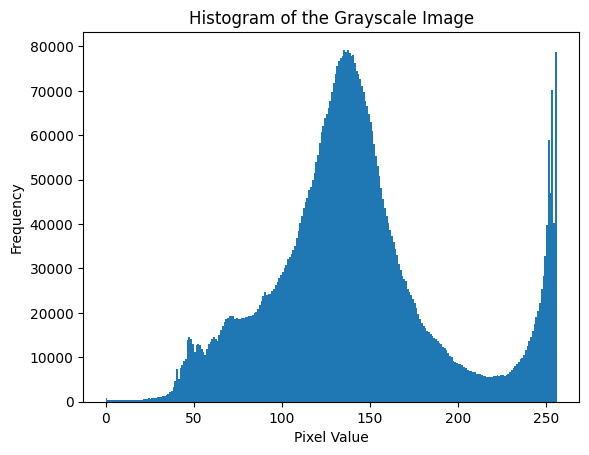

In [3]:
# Load the grayscale image
image = cv2.imread('/content/drive/MyDrive/Sample.jpeg', cv2.IMREAD_GRAYSCALE)

if image is not None:
    # Calculate the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Plot the histogram
    plt.hist(image.ravel(), 256, [0, 256])
    plt.title('Histogram of the Grayscale Image')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Image loading failed.")

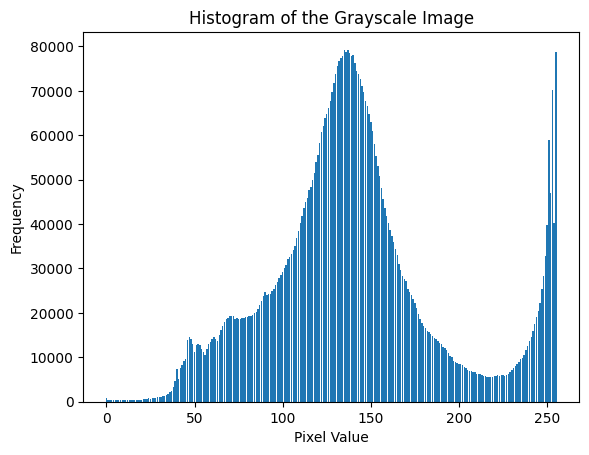

In [4]:
if image is not None:
    histogram = np.zeros(256, dtype=int)

    # Calculate the histogram
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            pixel_value = image[i, j]
            histogram[pixel_value] += 1

    # Plot the histogram
    plt.bar(np.arange(256), histogram)
    plt.title('Histogram of the Grayscale Image')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Image loading failed.")

# b

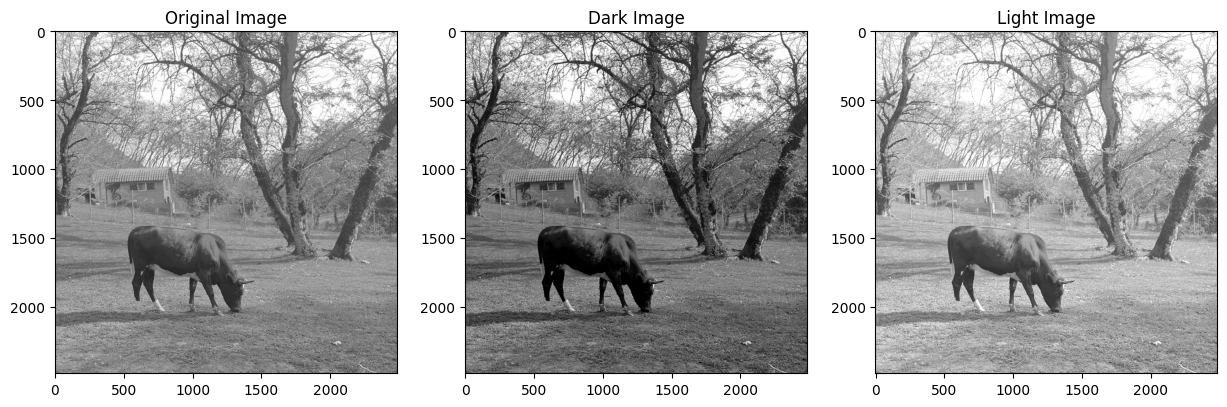

In [5]:
# Define a function for histogram sliding
def slide_histogram(image, shift_value):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            new_value = int(image[i, j]) + shift_value
            if new_value > 255:
                result[i, j] = 255
            elif new_value < 0:
                result[i, j] = 0
            else:
                result[i, j] = new_value

    return result

# create a darker version
dark_image = slide_histogram(image, shift_value=-50)

# create a lighter version
light_image = slide_histogram(image, shift_value=50)

# Display the original image, the dark image and the light image
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(dark_image, cmap='gray')
plt.title('Dark Image')

plt.subplot(1, 3, 3)
plt.imshow(light_image, cmap='gray')
plt.title('Light Image')

plt.show()

# c

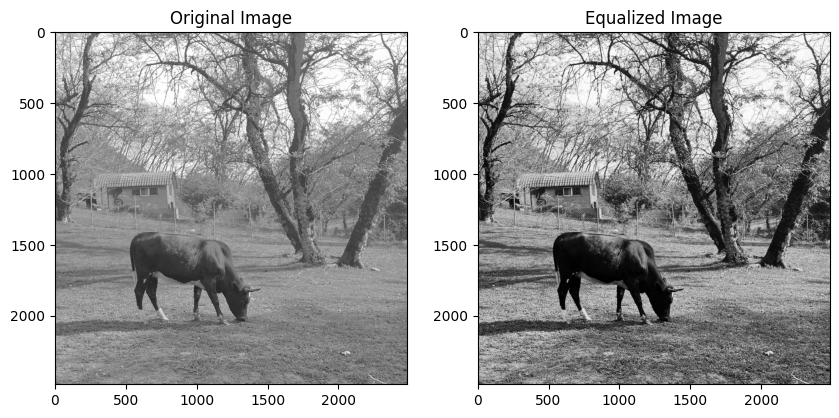

In [6]:
# Calculate the histogram of the image
hist, bins = np.histogram(image.flatten(), 256, [0, 256])

# Calculate the CDF of the histogram
cdf = hist.cumsum()
# Normalize CDF to the 0-255 range
cdf_normalized = (cdf / cdf[-1]) * 255

# Apply histogram equalization
equalized_image = cdf_normalized[image]

# Convert to uint8 data type
equalized_image = equalized_image.astype(np.uint8)

#hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
# Plot the histogram
#plt.hist(equalized_image.ravel(), 256, [0, 256])
#plt.title('Histogram of the Grayscale Image')
#plt.xlabel('Pixel Value')
#plt.ylabel('Frequency')
#plt.show()

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.show()

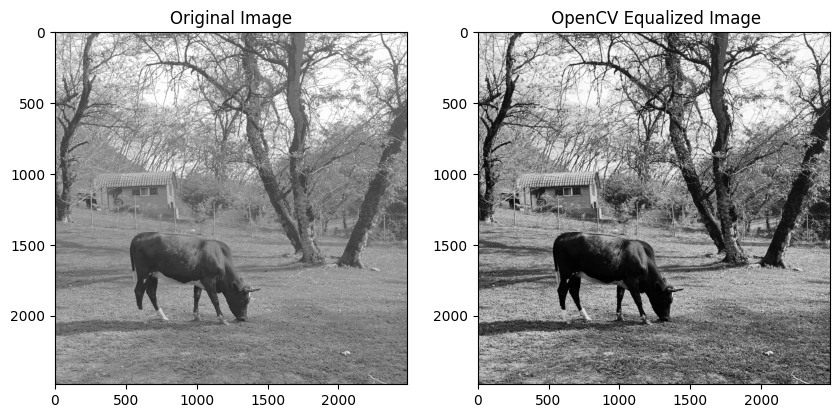

In [7]:
# Use OpenCV's histogram equalization
equalized_image_opencv = cv2.equalizeHist(image)

# Plot the histogram
#plt.hist(equalized_image_opencv.ravel(), 256, [0, 256])
#plt.title('Histogram of the Grayscale Image')
#plt.xlabel('Pixel Value')
#plt.ylabel('Frequency')
#plt.show()

# Display the OpenCV equalization result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_opencv, cmap='gray')
plt.title(' OpenCV Equalized Image')

plt.show()

# Q2

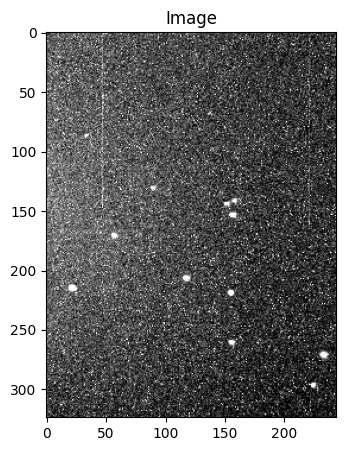

In [20]:
import re

# Load input
input_file_path = '/content/drive/MyDrive/input1.txt'
with open(input_file_path, 'r') as file:
    input_data = file.readlines()

# Parse the input data
w, h, expected, *rgb_values = map(int, re.findall(r'\d+', ''.join(input_data)))
pixel_count = w * h
star_image = np.array(rgb_values[:pixel_count * 3], dtype=np.uint8).reshape(w, h, 3)

# Plot the image
plt.figure(figsize=(10, 5))
plt.imshow(star_image, cmap='gray')
plt.title('Image')
plt.show()

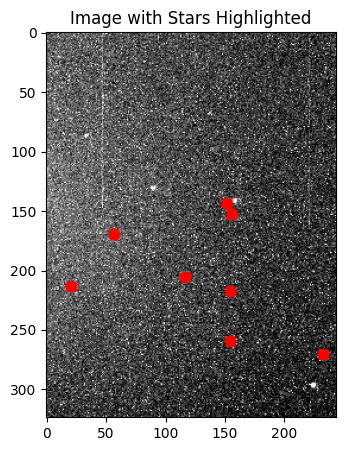

In [33]:
import cv2

# Convert the image array to grayscale
gray = cv2.cvtColor(star_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter and extract stars
stars = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 10:  # Adjust this threshold as needed
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            stars.append((cX, cY))

star_image_with_stars = cv2.cvtColor(star_image, cv2.COLOR_BGR2RGB)  # Convert to RGB
for star in stars:
    cv2.circle(star_image_with_stars, star, 5, (255, 0, 0), -1)  # Draw red circles

# Plot the image with highlighted stars
plt.figure(figsize=(10, 5))
plt.imshow(star_image_with_stars)
plt.title('Image with Stars Highlighted')
plt.show()

In [34]:
print("Number of detected stars:", len(stars))
for star in stars:
    print("Star at coordinates:", star)

if len(stars) >= expected:
    print("Test passed.")
    #print(expected)
else:
    print("Test failed.")

Number of detected stars: 8
Star at coordinates: (233, 271)
Star at coordinates: (155, 260)
Star at coordinates: (155, 218)
Star at coordinates: (21, 214)
Star at coordinates: (117, 206)
Star at coordinates: (57, 170)
Star at coordinates: (156, 153)
Star at coordinates: (152, 144)
Test passed.
